<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Setting the accuracy
DecPlace = 4    # number of decimal places - число знаков после запятой

# Numpy settings
np.set_printoptions(
    precision = DecPlace, 
    floatmode='fixed')

# Pandas settings
pd.set_option('display.max_colwidth', None)    # текст в ячейке отражался полностью вне зависимости от длины
#pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.float_format', lambda x: ('%.'+str(DecPlace)+'f') % x)

# Seaborn settings
sns.set(style="white", palette="muted", color_codes=True)
#sns.set_style('whitegrid')    #{'darkgrid', 'whitegrid'}
sns.set_context(context='paper', font_scale=1, rc=None)    # 'paper', 'notebook', 'talk', 'poster', None

# Mathplotlib settings
f_size = 8    # пользовательская переменная для задания базового размера шрифта
plt.rcParams['figure.titlesize'] = f_size + 2    # шрифт заголовка
plt.rcParams['axes.titlesize'] = f_size + 6      # шрифт заголовка
plt.rcParams['axes.labelsize'] = f_size + 2       # шрифт подписей осей
plt.rcParams['xtick.labelsize'] = f_size      # шрифт подписей меток
plt.rcParams['ytick.labelsize'] = f_size
plt.rcParams['legend.fontsize'] = f_size + 2      # шрифт легенды
plt.rcParams['text.usetex'] = False    # поддержка TeX

# Исследование структуры данных

#### 1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [32]:
# загружаем исходные данные
hh_database = pd.read_csv(
    filepath_or_buffer='data/dst-3.0_16_1_hh_database.csv',
    sep=';'
    )

# создаем копию исходного датасета для работы: с целью унификации удобнее работать с датасетом, имеющим стандартное наименование (raw - необработанный)
dataset_df_raw = hh_database.copy()    


# отвечаем на контрольный вопрос №2.1
# -----------------------------------
# Чему равна размерность таблицы? Введите её в виде кортежа (число строк, число столбцов).
print(f'Чему равна размерность таблицы? Введите её в виде кортежа (число строк, число столбцов). {dataset_df_raw.shape}\n')

Чему равна размерность таблицы? Введите её в виде кортежа (число строк, число столбцов). (44744, 12)



#### 2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [33]:
#display(dataset_df_raw)
display(dataset_df_raw.head(3)), display(dataset_df_raw.tail(3))

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к переезду , не готов к командировкам","частичная занятость, проектная работа, полная занятость","гибкий график, полный день, сменный график, вахтовый метод, удаленная работа","Опыт работы 16 лет 10 месяцев Август 2010 — по настоящее время 8 лет 10 месяцев МАОУ ""СОШ № 1 г.Немана"" Системный администратор Обслуживание ПК,установка ПО, ремонт, периферийной техники, Интернет локальная сеть. Ведение Электронного журнала, сайта организации. Август 2002 — Август 2010 8 лет 1 месяц ТС ""ВЕСТЕР-ИНФО"" Старший продавец, директор отдела Продажи компьютерной техники","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,"Неоконченное высшее образование 2000 Балтийская государственная академия рыбопромыслового флота, Калининград судоводительский, Организация и безопасность движения",16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким командировкам","частичная занятость, проектная работа, полная занятость","гибкий график, полный день, сменный график, удаленная работа","Опыт работы 19 лет 5 месяцев Январь 2000 — по настоящее время 19 лет 5 месяцев Временный трудовой коллектив Москва Информационные технологии, системная интеграция, интернет ... Разработка программного обеспечения Системная интеграция, автоматизации технологических и бизнес-процессов предприятия, ИТ-консалтинг Менеджер проекта, Аналитик, Технический писатель Весь цикл ПО, кроме программирования.",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель","Высшее образование 1981 Военно-космическая академия им. А.Ф. Можайского, Санкт-Петербург АСУ, АСУ",12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к командировкам",полная занятость,полный день,"Опыт работы 10 лет 3 месяца Октябрь 2004 — Декабрь 2014 10 лет 3 месяца ПАО Сбербанк Кассир-операционист Работа с денежной наличностью, обслуживание клиентов, операции с иностранной валютой, проведение инкассации, составление и обработка первичных документов.",ПАО Сбербанк,Кассир-операционист,"Среднее специальное образование 2002 Профессиональный лицей 39 г. Твери Экономический, Банковское дело",16.04.2019 08:35,Не указано


Пол, возраст           ЗП  \
44741  Женщина ,  48 лет , родилась 26 декабря 1970   40000 руб.   
44742   Мужчина ,  24 года , родился 6 октября 1994   20000 руб.   
44743    Мужчина ,  38 лет , родился 25 апреля 1980  120000 руб.   

        Ищет работу на должность:  \
44741  Аналитик данных, Математик   
44742            Контент-менеджер   
44743        Руководитель проекта   

                                        Город, переезд, командировки  \
44741  Челябинск , готова к переезду , готова к редким командировкам   
44742        Тамбов , не готов к переезду , не готов к командировкам   
44743        Москва , не готов к переезду , не готов к командировкам   

                                   Занятость                         График  \
44741                       полная занятость  полный день, удаленная работа   
44742  частичная занятость, полная занятость               удаленная работа   
44743                       полная занятость                    полный день   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

(None, None)

**<u>Вывод</u>**: признаков нарушения данных не обнаружено.

#### 3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [34]:
dataset_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

**<u>Выводы</u>**: 

1. Все признаки имеют тип `object`.
2. Обнаружены признаки, имеющие пустые значения (число строк, имеющих ненулевые значения `non-null` не равно общему числу записей `RangeIndex: 44744 entries`).

#### 4. Обратите внимание на информацию о числе непустых значений.

Число non-null для всех признаков:
Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

Список признаков, не содержащих non-null:
['Пол, возраст', 'ЗП', 'Ищет работу на должность:', 'Город, переезд, командировки', 'Занятость', 'График', 'Образование и ВУЗ', 'Обновление резюме', 'Авто']

Список признаков, содержащих non-null:
['Опыт работы', 'Последнее/нынешнее место работы', 'Последняя/нынешняя должность']



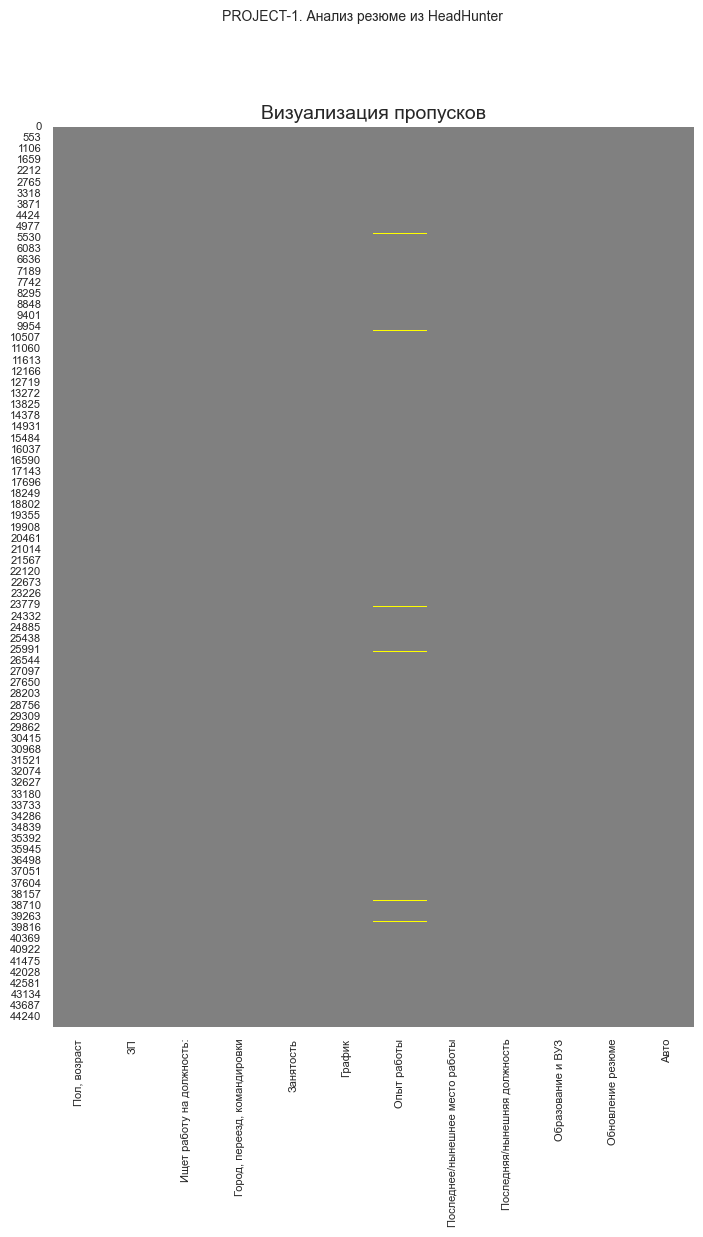

In [35]:
# ФИЛЬТРАЦИЯ ПРИЗНАКОВ ПО КРИТЕРИЮ НАЛИЧИЯ/ОТСУТСТВИЯ ПУСТЫХ ЗНАЧЕНИЙ
# -------------------------------------------------------------------
'''
выполним фильтрацию признаков по критерию наличия/отсутствия пустых значений 
(т.е. признаков, у которых общее число записей не равно/равно числу non-null)
(подробное решение задачи, на практике такие подробности можно опустить)
'''

# создаем series, в котором содержится информация о числе non-null для всех признаков
series_4 = dataset_df_raw.isna().sum()
print(f'Число non-null для всех признаков:\n{series_4}\n')    

# фильтруем признаки, не содержащие non-null
print(f'Список признаков, не содержащих non-null:\n{series_4.loc[lambda x: x == 0].index.tolist()}\n')    

# фильтруем признаки, содержащие non-null
print(f'Список признаков, содержащих non-null:\n{series_4.loc[lambda x: x > 0].index.tolist()}\n')    


# ВИЗУАЛИЗАЦИЯ ПРОПУСКОВ
# ----------------------
'''
выполним визуализацию с помощью графика тепловой карты (heatmap)
'''

detection_values = [np.nan, pd.NA]    # список значений, подлежащих визуализации
detection_values_df = dataset_df_raw.isin(detection_values)

# введение некоторые общие параметры графиков, которые будут использоваться при визуализации данных во всем проекте
INCH = 25.4    # константа - мм/дюйм
title_figure = 'PROJECT-1. Анализ резюме из HeadHunter'    # название проекта

# построение графика
'''
Примечание: отображение пропусков на тепловой карте зависит от количества записей в датасете и доли пропусков - 
в случае малой величины этой доли пропуски могут не отобразиться, в этом случае необходимо увеличивать масштаб графика,
однако в разумных  пределах. heatmap тоже не идеален. 
Для очень больших датасетов с малым числом пропусков такой способ визуализации не подходит.
В нашем случае для отдельных признаков ('Последнее/нынешнее место работы', 'Последняя/нынешняя должность') пропуски не отобразятся.
'''
graph_size = (210/INCH, 297/INCH)    # размер графика
fig, axes = plt.subplots(figsize = graph_size)
fig.suptitle(title_figure, fontsize = 10)    # заголовок рисунка (Figure)
axes.set_title('Визуализация пропусков', fontsize = 14)    # заголовок области рисования (Axes)
sns.heatmap(
    detection_values_df,
    cmap = sns.color_palette(['grey', 'yellow']),
    cbar = False,
    ax = axes)
plt.show()

**<u>Вывод</u>**: пустые значения обнаружены для признков `Опыт работы`, `Последнее/нынешнее место работы`, `Последняя/нынешняя должность`.

#### 5. Выведите основную статистическую информацию о столбцах.

In [36]:
display(dataset_df_raw.describe(include='all'))
#display(dataset_df_raw.agg(['describe']))

'''
Существует еще 2 способа получения описательной статистики для DataFrame:
    - с помощью функции pandas.DataFrame.agg (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) - 
      позволяет получить результат, аналогичный использованному;
    - с помощью функции statsmodels.stats.descriptivestats.Description (https://www.statsmodels.org/stable/generated/statsmodels.stats.descriptivestats.Description.html) - 
      по условию задачи здесь не применяется.
'''


# отвечаем на контрольный вопрос №2.5
# -----------------------------------

# Сколько уникальных значений содержится в столбце «Опыт работы»?
print(f'Сколько уникальных значений содержится в столбце «Опыт работы»? {dataset_df_raw.describe(include='all').loc['unique', 'Опыт работы']}\n')

# Какая из искомых должностей самая распространённая?
print(f'Какая из искомых должностей самая распространённая?? {dataset_df_raw.describe(include='all').loc['top', 'Последняя/нынешняя должность']}\n')

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к командировкам",полная занятость,полный день,"Опыт работы 10 лет 8 месяцев Апрель 2018 — по настоящее время 1 год 2 месяца ООО Форсаж Санкт-Петербург Автомобильный бизнес ... Автозапчасти, шины (розничная торговля) Легковые, грузовые автомобили, мототехника, автобусы, троллейбусы (производство) Розничная торговля автомобилями (дилерский центр) Техническое обслуживание, ремонт автомобилей Финансовые услуги (кэптивные банки и лизинговые компании) Программист 1C 8.3 Разработка и внедрение необходимого функционала по требованию компании. Техническая поддержка пользователей. Администрирование базы данных. Достижения: внедрение нового функционала для отдела сервисного обслуживания, который повысил оборот и конверсию. Июнь 2016 — Март 2018 1 год 10 месяцев ООО ""Бутик Матрешка Москва Розничная торговля ... Розничная сеть (книги, игрушки, подарки, часы и прочее) Специалист по логистике Обязанности: Оприходование товара на склад. Работа с поставщиками. Анализ продаж и формирование заказа поставщикам (более 5000 наименований). Проведение инвентаризаций. IT-поддержка пользователей (продавцов-кассиров), обучение персонала работе в 1С. Достижения: доработка конфигурации 1С под нужды предприятия. Снижение количества неликвидного товара в магазинах и на складе. Июль 2014 — Май 2016 1 год 11 месяцев ОАО ""МегаФон Ритейл"" Москва , megafon.ru Телекоммуникации, связь ... Мобильная связь Эксперт по мобильным технологиям Помощь и консультация в обращении с мобильными устройствами, продажа мобильных устройств, консультирование по тарифам связи, документооборот, проведение инвентаризаций Октябрь 2013 — Февраль 2014 5 месяцев Аброн Холдинг Москва , visionpro.ru Менеджер по продажам Продажа и консультирование клиентов по продуктам видеонаблюдения, СКУД, ОПС. Июль 2011 — Сентябрь 2013 2 года 3 месяца Шоколадница, Сеть кофеен Москва , www.shoko.ru Гостиницы, рестораны, общепит, кейтеринг ... Ресторан, общественное питание, фаст-фуд Бармен Приготовление напитков, содержание в чистоте рабочего места, проведение еженедельных инвентаризаций. Июнь 2008 — Июль 2011 3 года 2 месяца ООО ТД Аброн Холдинг visionpro.ru Курьер Доставка документов, материальных ценностей и денежных средств",Индивидуальное предпринимательство / частная практика / фриланс,Системный администратор,"Высшее образование 1987 Военный инженерный Краснознаменный институт им. А.Ф. Можайского факультет автоматизированных систем сбора и обработки информации, математическое обеспечение автоматизированных систем, инженер-математик",07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


Сколько уникальных значений содержится в столбце «Опыт работы»? 44413

Какая из искомых должностей самая распространённая?? Системный администратор



# Преобразование данных

In [37]:
display(dataset_df_raw.head(3))#, display(dataset_df_raw.tail(3))

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к переезду , не готов к командировкам","частичная занятость, проектная работа, полная занятость","гибкий график, полный день, сменный график, вахтовый метод, удаленная работа","Опыт работы 16 лет 10 месяцев Август 2010 — по настоящее время 8 лет 10 месяцев МАОУ ""СОШ № 1 г.Немана"" Системный администратор Обслуживание ПК,установка ПО, ремонт, периферийной техники, Интернет локальная сеть. Ведение Электронного журнала, сайта организации. Август 2002 — Август 2010 8 лет 1 месяц ТС ""ВЕСТЕР-ИНФО"" Старший продавец, директор отдела Продажи компьютерной техники","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,"Неоконченное высшее образование 2000 Балтийская государственная академия рыбопромыслового флота, Калининград судоводительский, Организация и безопасность движения",16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким командировкам","частичная занятость, проектная работа, полная занятость","гибкий график, полный день, сменный график, удаленная работа","Опыт работы 19 лет 5 месяцев Январь 2000 — по настоящее время 19 лет 5 месяцев Временный трудовой коллектив Москва Информационные технологии, системная интеграция, интернет ... Разработка программного обеспечения Системная интеграция, автоматизации технологических и бизнес-процессов предприятия, ИТ-консалтинг Менеджер проекта, Аналитик, Технический писатель Весь цикл ПО, кроме программирования.",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель","Высшее образование 1981 Военно-космическая академия им. А.Ф. Можайского, Санкт-Петербург АСУ, АСУ",12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к командировкам",полная занятость,полный день,"Опыт работы 10 лет 3 месяца Октябрь 2004 — Декабрь 2014 10 лет 3 месяца ПАО Сбербанк Кассир-операционист Работа с денежной наличностью, обслуживание клиентов, операции с иностранной валютой, проведение инкассации, составление и обработка первичных документов.",ПАО Сбербанк,Кассир-операционист,"Среднее специальное образование 2002 Профессиональный лицей 39 г. Твери Экономический, Банковское дело",16.04.2019 08:35,Не указано


#### 1. Начнем с простого - с признака **"Образование и ВУЗ"**.

Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


,count,proportion
Образование,,
высшее,33863,0.7568
среднее специальное,5765,0.1288
неоконченное высшее,4557,0.1018
среднее,559,0.0125
sum,44744,1.0000


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к переезду , не готов к командировкам","частичная занятость, проектная работа, полная занятость","гибкий график, полный день, сменный график, вахтовый метод, удаленная работа","Опыт работы 16 лет 10 месяцев Август 2010 — по настоящее время 8 лет 10 месяцев МАОУ ""СОШ № 1 г.Немана"" Системный администратор Обслуживание ПК,установка ПО, ремонт, периферийной техники, Интернет локальная сеть. Ведение Электронного журнала, сайта организации. Август 2002 — Август 2010 8 лет 1 месяц ТС ""ВЕСТЕР-ИНФО"" Старший продавец, директор отдела Продажи компьютерной техники","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким командировкам","частичная занятость, проектная работа, полная занятость","гибкий график, полный день, сменный график, удаленная работа","Опыт работы 19 лет 5 месяцев Январь 2000 — по настоящее время 19 лет 5 месяцев Временный трудовой коллектив Москва Информационные технологии, системная интеграция, интернет ... Разработка программного обеспечения Системная интеграция, автоматизации технологических и бизнес-процессов предприятия, ИТ-консалтинг Менеджер проекта, Аналитик, Технический писатель Весь цикл ПО, кроме программирования.",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к командировкам",полная занятость,полный день,"Опыт работы 10 лет 3 месяца Октябрь 2004 — Декабрь 2014 10 лет 3 месяца ПАО Сбербанк Кассир-операционист Работа с денежной наличностью, обслуживание клиентов, операции с иностранной валютой, проведение инкассации, составление и обработка первичных документов.",ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Обновление резюме                44744 non-null  object
 10  Авто                             44744 non-null  object
 11  Образование                      44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

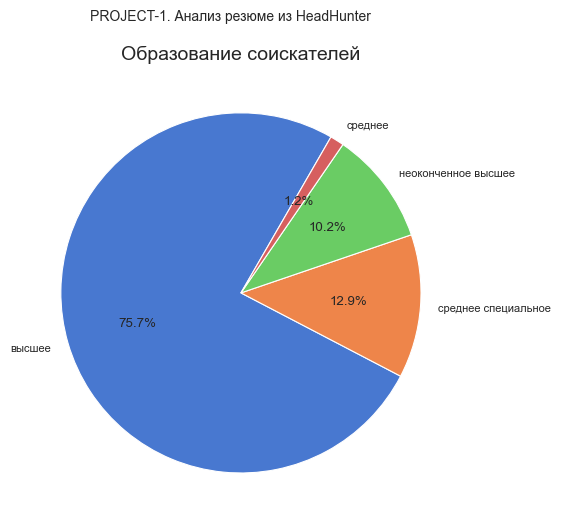

In [38]:
'''
Порядок действий при решении задачи:
1. Для преобразования всех записей признака используем метод apply(), который применяем последовательно к исходному датасету.

2. Сформируем новый признак 'Образование':
    - для всех записей признака 'Образование и ВУЗ' (являющегося по сути str) с помощью метода split разобьем значения на отдельные подстроки, 
      при этом получим список;
    - с помощью среза выделим в списке 2 первых элемента, т.е. 2 первых слова гарантирующих информацию об образовании;
    - с помощью метода join объединим 2 полученных элемента списка в строку с разделителем в виде пробела;
    - с помощью метода replace удалим из полученных строк фрагмент " образование";
    - с помощью метода lower приведем все символы к нижнему регистру.
  Примечание: для удаления или изменения строк по шаблону целесообразнее использовать регулярные выражения и функцию re.sub(), 
  однако по условию задачи применять их нельзя.

3. Удаляем признак 'Образование и ВУЗ'.

4. Отвечаем на контрольные вопросы.

5. Дополнительно - выполним визуализацию.
'''

# формируем новый признак "Образование"
dataset_df_raw['Образование'] = dataset_df_raw['Образование и ВУЗ'].\
    apply(lambda x: x.split()[:2]).\
        apply(lambda x: ' '.join(x)).\
            apply(lambda x: x.replace(' образование', '')).\
                apply(lambda x: x.lower())

# проверяем категории нового признака "Образование" - определяем частоты уникальных значений и их доли
df_3_1 = pd.DataFrame(dataset_df_raw['Образование'].value_counts())
df_3_1['proportion'] = df_3_1['count'] / df_3_1['count'].sum()
df_3_1.loc['sum'] = df_3_1.sum()
display(df_3_1.
        style.format(formatter = {
          'count': '{:.0f}',
          'proportion': '{:.4f}'}))
'''
Видим, что сумма числа значений всех рассматриваемого категорий признака равна общему числу записей в исходном датасете, следовательно, формирование этого признака выполнено правильно.
'''

# удаляем признак "Образование и ВУЗ"
dataset_df_raw = dataset_df_raw.drop(columns = 'Образование и ВУЗ')

# откорректированный датасет
display(dataset_df_raw.head(3))#, display(dataset_df_raw.tail(3))
dataset_df_raw.info()

# дополнительно - построим круговую диаграмму уровня образования соискателей
data = dataset_df_raw['Образование'].value_counts()
fig, axes = plt.subplots(figsize = (210/INCH, 297/INCH/2))
fig.suptitle(title_figure, fontsize = 10)    # заголовок рисунка (Figure)
axes.set_title('Образование соискателей', fontsize = 14)    # заголовок области рисования (Axes)
axes = data.plot.pie(
    label = "",
    #figsize = (210/INCH, 297/INCH/2),
    autopct = '%.1f%%',
    startangle = 60,
    legend = False,
    title = "")
plt.show()

#### 2. Теперь нас интересует столбец **"Пол, возраст"**. 

Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [39]:
'''
Порядок действий при решении задачи:
1. Для преобразования всех записей признака используем метод apply(), который применяем последовательно к исходному датасету.

2. Сформируем новый признак 'Пол':
    - для всех записей признака 'Пол, возраст' с помощью метода split разобьем значения на отдельные подстроки: разделитель - пробел (sep = ' '), 
      число подстрок - 2 (maxsplit = 1), при этом учитываем, что в тексте записи признака после первого слова 'Мужчина' или 'Женщина' следует пробел;
    - с помощью lambda-функции преобразуем значения признака 'Пол': 'Мужчина' - в 'М', 'Женщина' - в 'Ж';
    - проверяем категории нового признака "Пол" - определяем частоты уникальных значений и их сумму

3. Сформируем новый признак 'Возраст':
    - для всех записей признака 'Пол, возраст' с помощью метода split разобьем значения на отдельные подстроки: разделитель - пробел (sep = ' '), 
      число подстрок - по всем вхождениям параметра sep (maxsplit = -1);
    - с помощью метода astype преобразуем данные к целочисленному типу (int);
    - проверяем категории нового признака "Пол" - определяем частоты уникальных значений и их сумму

4. Удаляем признак 'Пол , возраст , дата рождения'.

5. Отвечаем на контрольные вопросы.

6. Дополнительно - выполним визуализацию.
'''

# формируем новый признак "Пол"
dataset_df_raw['Пол'] = dataset_df_raw['Пол, возраст'].\
    apply(lambda x: x.split(sep = ' ', maxsplit = 1)[0]).\
        apply(lambda x: 'М' if (x == 'Мужчина') else 'Ж' if (x == 'Женщина') else x)

# проверяем категории нового признака "Пол" - определяем частоты уникальных значений и их доли
df_3_2_1 = pd.DataFrame(dataset_df_raw['Пол'].value_counts())
df_3_2_1['proportion'] = df_3_2_1['count'] / df_3_2_1['count'].sum()
df_3_2_1.loc['sum'] = df_3_2_1.sum()
display(df_3_2_1.
        style.format(formatter = {
          'count': '{:.0f}',
          'proportion': '{:.4f}'}))
'''
Видим, что сумма числа значений всех рассматриваемого категорий признака равна общему числу записей в исходном датасете, следовательно, формирование этого признака выполнено правильно.
'''

# формируем новый признак "Возраст"
dataset_df_raw['Возраст'] = dataset_df_raw['Пол, возраст'].\
    apply(lambda x: x.split(sep = ' ', maxsplit = -1)[3]).\
        astype('int')

# проверяем категории нового признака "Возраст" - определяем частоты уникальных значений и их доли
print(dataset_df_raw['Возраст'].value_counts())
print(f'Сумма частот уникальных значений: {dataset_df_raw['Возраст'].value_counts().sum()}\n')
'''
Видим, что сумма числа значений всех рассматриваемого категорий признака равна общему числу записей в исходном датасете, следовательно, формирование этого признака выполнено правильно.
'''

# удаляем признак "Пол, возраст"
dataset_df_raw = dataset_df_raw.drop(columns = 'Пол, возраст')
#display(dataset_df_raw.head(3))#, display(dataset_df_raw.tail(3))

# откорректированный датасет
display(dataset_df_raw.head(3))#, display(dataset_df_raw.tail(3))
dataset_df_raw.info()

# контрольный вопрос №3.2 - чему равен средний возраст соискателей
print(f'Средний возраст соискателей: {round(dataset_df_raw['Возраст'].mean(), 1)}\n')

,count,proportion
Пол,,
М,36211,0.8093
Ж,8533,0.1907
sum,44744,1.0000


Возраст
30     2834
29     2765
28     2748
31     2675
27     2583
       ... 
15        2
77        1
76        1
14        1
100       1
Name: count, Length: 63, dtype: int64
Сумма частот уникальных значений: 44744



,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к переезду , не готов к командировкам","частичная занятость, проектная работа, полная занятость","гибкий график, полный день, сменный график, вахтовый метод, удаленная работа","Опыт работы 16 лет 10 месяцев Август 2010 — по настоящее время 8 лет 10 месяцев МАОУ ""СОШ № 1 г.Немана"" Системный администратор Обслуживание ПК,установка ПО, ремонт, периферийной техники, Интернет локальная сеть. Ведение Электронного журнала, сайта организации. Август 2002 — Август 2010 8 лет 1 месяц ТС ""ВЕСТЕР-ИНФО"" Старший продавец, директор отдела Продажи компьютерной техники","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким командировкам","частичная занятость, проектная работа, полная занятость","гибкий график, полный день, сменный график, удаленная работа","Опыт работы 19 лет 5 месяцев Январь 2000 — по настоящее время 19 лет 5 месяцев Временный трудовой коллектив Москва Информационные технологии, системная интеграция, интернет ... Разработка программного обеспечения Системная интеграция, автоматизации технологических и бизнес-процессов предприятия, ИТ-консалтинг Менеджер проекта, Аналитик, Технический писатель Весь цикл ПО, кроме программирования.",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к командировкам",полная занятость,полный день,"Опыт работы 10 лет 3 месяца Октябрь 2004 — Декабрь 2014 10 лет 3 месяца ПАО Сбербанк Кассир-операционист Работа с денежной наличностью, обслуживание клиентов, операции с иностранной валютой, проведение инкассации, составление и обработка первичных документов.",ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ЗП                               44744 non-null  object
 1   Ищет работу на должность:        44744 non-null  object
 2   Город, переезд, командировки     44744 non-null  object
 3   Занятость                        44744 non-null  object
 4   График                           44744 non-null  object
 5   Опыт работы                      44576 non-null  object
 6   Последнее/нынешнее место работы  44743 non-null  object
 7   Последняя/нынешняя должность     44742 non-null  object
 8   Обновление резюме                44744 non-null  object
 9   Авто                             44744 non-null  object
 10  Образование                      44744 non-null  object
 11  Пол                              44744 non-null  object
 12  Возраст                         

#### 3. Следующим этапом преобразуем признак **"Опыт работы"**.

Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [40]:
# вначале отфильтруем и взглянем на записи без пропусков
mask = dataset_df_raw['Опыт работы'].notnull()
dataset_df_raw_0 = pd.DataFrame(dataset_df_raw[mask])
display(dataset_df_raw_0.head(2))#, display(dataset_df_raw_0.tail(1))
dataset_df_raw_0.info()

# очевидно, что среди этих записей скрываются неявные пропуски, которые нужно перевести в явные
mask = dataset_df_raw_0['Опыт работы'] == 'Не указано'
dataset_df_raw_0_1 = pd.DataFrame(dataset_df_raw_0[mask])
display(dataset_df_raw_0_1.head(2))#, display(dataset_df_raw_0_1.tail(1))
dataset_df_raw_0_1.info()

# затем отфильтруем и взглянем на записи с пропусками
mask = dataset_df_raw['Опыт работы'].isna()
dataset_df_raw_1 = pd.DataFrame(dataset_df_raw[mask])
display(dataset_df_raw_1.head(2))#, display(dataset_df_raw_1.tail(1))
dataset_df_raw_1.info()
'''
Баланс числа записей (без пропусков / явные пропуски / всего): 44576 + 168 = 44744
'''

# преобразуем неявные пропуски в явные
dataset_df_raw['Опыт работы'] = dataset_df_raw['Опыт работы'].\
    apply(lambda x: np.nan if x == 'Не указано' else x)
display(dataset_df_raw.head(2))#, display(dataset_df_raw.tail(1))
dataset_df_raw.info()
'''
Видим, что баланс числа записей (без пропусков / явные пропуски / всего) изменился: 44574 + 170 = 44744
Неявные пропуски преобразованы в явные.
'''

'''
Далее, порядок действий при решении задачи:
1. Для преобразования всех записей признака используем метод apply(), который применяем последовательно к исходному датасету.

2. Сформируем новый признак 'Опыт работы (месяц)':
    - для всех записей признака 'Пол, возраст' с помощью метода split разобьем значения на отдельные подстроки: разделитель - пробел (sep = ' '), 
      число подстрок - по всем вхождениям параметра sep (maxsplit = -1);
    - с помощью среза выделим в списке элементы с 3-го по 6-й, т.е. удалим первые слова 'Опыт работы' и оставим последующие 4 слова, 
      содержащие информацию об опыте работы в годах и месяцах;
    - в зависимости от того, как представлен опты работы (в годах и месяцах, только в годах или только в месяцах), выполним расчет опыта работы в месяцах,
      и добавим в датасет новый признак 'Опыт работы (месяц)' с помощью пользовательской функции work_experience_month.
    
3. Дополнительно - проверим корректность полученных данных на наличие выбросов.

4. Удаляем признак 'Опыт работы'.

5. Отвечаем на контрольные вопросы.

6. Дополнительно - выполним визуализацию.
'''

# формируем новый признак "Опыт работы (месяц)"
def work_experience_month(S: str):
    result = np.nan
    if isinstance(S, str):
        S = S.split(sep = ' ', maxsplit = -1)
        if len(S) >= 4 and S[2].isnumeric():
            L = S[2:6]
            if (L[1] == 'лет') or (L[1][0] == 'г'):
                result = float(L[0])*12
                if L[2].isnumeric() and (L[3][0] == 'м'):
                    result += float(L[2])
            if (L[1][0] == 'м'):
                result = float(L[0])
    return result

dataset_df_raw['Опыт работы (месяц)'] = dataset_df_raw['Опыт работы'].\
    apply(work_experience_month)
display(dataset_df_raw.head(2))#, display(dataset_df_raw_0.tail(2))
dataset_df_raw.info()

# выводим описательную статистику по новому признаку "Опыт работы (месяц)"
display(dataset_df_raw['Опыт работы (месяц)'].describe(include='all'))
'''
Видим, что признак имеет явно аномальные выбросы в области наибольших значений.
Для информации отфильтруем такие значения и проанализируем их.
'''
 
mask = dataset_df_raw['Опыт работы (месяц)'] > (70-18)*12
display(dataset_df_raw[mask])
'''
Видим, что запись №40015 явно содержит ошибки: для соискателя возрастом 48 лет указан опыт работы 99 лет.
Запись должна быть исключена или откорректирована.
'''

# удаляем признак "Опыт работы"
dataset_df_raw = dataset_df_raw.drop(columns = 'Опыт работы')
#display(dataset_df_raw.head(3))#, display(dataset_df_raw.tail(3))

# контрольный вопрос №3.3 - чему равен медианный опыт работы (в месяцах) в нашей таблице?
print(f'Медианный опты работы: {dataset_df_raw['Опыт работы (месяц)'].median()}\n')

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к переезду , не готов к командировкам","частичная занятость, проектная работа, полная занятость","гибкий график, полный день, сменный график, вахтовый метод, удаленная работа","Опыт работы 16 лет 10 месяцев Август 2010 — по настоящее время 8 лет 10 месяцев МАОУ ""СОШ № 1 г.Немана"" Системный администратор Обслуживание ПК,установка ПО, ремонт, периферийной техники, Интернет локальная сеть. Ведение Электронного журнала, сайта организации. Август 2002 — Август 2010 8 лет 1 месяц ТС ""ВЕСТЕР-ИНФО"" Старший продавец, директор отдела Продажи компьютерной техники","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким командировкам","частичная занятость, проектная работа, полная занятость","гибкий график, полный день, сменный график, удаленная работа","Опыт работы 19 лет 5 месяцев Январь 2000 — по настоящее время 19 лет 5 месяцев Временный трудовой коллектив Москва Информационные технологии, системная интеграция, интернет ... Разработка программного обеспечения Системная интеграция, автоматизации технологических и бизнес-процессов предприятия, ИТ-консалтинг Менеджер проекта, Аналитик, Технический писатель Весь цикл ПО, кроме программирования.",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60


<class 'pandas.core.frame.DataFrame'>
Index: 44576 entries, 0 to 44743
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ЗП                               44576 non-null  object
 1   Ищет работу на должность:        44576 non-null  object
 2   Город, переезд, командировки     44576 non-null  object
 3   Занятость                        44576 non-null  object
 4   График                           44576 non-null  object
 5   Опыт работы                      44576 non-null  object
 6   Последнее/нынешнее место работы  44575 non-null  object
 7   Последняя/нынешняя должность     44574 non-null  object
 8   Обновление резюме                44576 non-null  object
 9   Авто                             44576 non-null  object
 10  Образование                      44576 non-null  object
 11  Пол                              44576 non-null  object
 12  Возраст                          4457

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст
19199,45000 руб.,системный администратор / инженер программист,"Пермь , готов к переезду , готов к редким командировкам",полная занятость,полный день,Не указано,"АО ""Предприятие В-1336""",Инженер-программист,10.04.2019 07:12,Не указано,высшее,М,39
26781,30000 руб.,Системный администратор,"Белгород , готов к переезду (Москва, Санкт-Петербург, Орел) , готов к командировкам",полная занятость,"гибкий график, полный день, сменный график, вахтовый метод, удаленная работа",Не указано,"Европа, Торговая сеть",Системный администратор,10.04.2019 07:11,Имеется собственный автомобиль,высшее,М,25


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 19199 to 26781
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ЗП                               2 non-null      object
 1   Ищет работу на должность:        2 non-null      object
 2   Город, переезд, командировки     2 non-null      object
 3   Занятость                        2 non-null      object
 4   График                           2 non-null      object
 5   Опыт работы                      2 non-null      object
 6   Последнее/нынешнее место работы  2 non-null      object
 7   Последняя/нынешняя должность     2 non-null      object
 8   Обновление резюме                2 non-null      object
 9   Авто                             2 non-null      object
 10  Образование                      2 non-null      object
 11  Пол                              2 non-null      object
 12  Возраст                          2 no

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст
64,10000 руб.,Системный администратор,"Санкт-Петербург , не готов к переезду , не готов к командировкам",полная занятость,"гибкий график, удаленная работа",NaN,"Санкт-Петербургский государственный университет телекоммуникаций им. проф. М.А. Бонч-Бруевича, Санкт-Петербург",Санкт-Петербургский колледж телекоммуникаций,14.04.2019 00:04,Не указано,высшее,М,33
118,30000 руб.,Специалист в службу поддержки Медиасервисов Яндекса,"Красноярск , не готова к переезду , не готова к командировкам",полная занятость,полный день,NaN,ЧЛК,"Забайкальский государственный гуманитарно-педагогический университет им. Н.Г. Чернышевского, Чита",17.04.2019 07:28,Не указано,высшее,Ж,40


<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 64 to 44250
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ЗП                               168 non-null    object
 1   Ищет работу на должность:        168 non-null    object
 2   Город, переезд, командировки     168 non-null    object
 3   Занятость                        168 non-null    object
 4   График                           168 non-null    object
 5   Опыт работы                      0 non-null      object
 6   Последнее/нынешнее место работы  168 non-null    object
 7   Последняя/нынешняя должность     168 non-null    object
 8   Обновление резюме                168 non-null    object
 9   Авто                             168 non-null    object
 10  Образование                      168 non-null    object
 11  Пол                              168 non-null    object
 12  Возраст                          168 n

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к переезду , не готов к командировкам","частичная занятость, проектная работа, полная занятость","гибкий график, полный день, сменный график, вахтовый метод, удаленная работа","Опыт работы 16 лет 10 месяцев Август 2010 — по настоящее время 8 лет 10 месяцев МАОУ ""СОШ № 1 г.Немана"" Системный администратор Обслуживание ПК,установка ПО, ремонт, периферийной техники, Интернет локальная сеть. Ведение Электронного журнала, сайта организации. Август 2002 — Август 2010 8 лет 1 месяц ТС ""ВЕСТЕР-ИНФО"" Старший продавец, директор отдела Продажи компьютерной техники","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким командировкам","частичная занятость, проектная работа, полная занятость","гибкий график, полный день, сменный график, удаленная работа","Опыт работы 19 лет 5 месяцев Январь 2000 — по настоящее время 19 лет 5 месяцев Временный трудовой коллектив Москва Информационные технологии, системная интеграция, интернет ... Разработка программного обеспечения Системная интеграция, автоматизации технологических и бизнес-процессов предприятия, ИТ-консалтинг Менеджер проекта, Аналитик, Технический писатель Весь цикл ПО, кроме программирования.",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ЗП                               44744 non-null  object
 1   Ищет работу на должность:        44744 non-null  object
 2   Город, переезд, командировки     44744 non-null  object
 3   Занятость                        44744 non-null  object
 4   График                           44744 non-null  object
 5   Опыт работы                      44574 non-null  object
 6   Последнее/нынешнее место работы  44743 non-null  object
 7   Последняя/нынешняя должность     44742 non-null  object
 8   Обновление резюме                44744 non-null  object
 9   Авто                             44744 non-null  object
 10  Образование                      44744 non-null  object
 11  Пол                              44744 non-null  object
 12  Возраст                         

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц)
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к переезду , не готов к командировкам","частичная занятость, проектная работа, полная занятость","гибкий график, полный день, сменный график, вахтовый метод, удаленная работа","Опыт работы 16 лет 10 месяцев Август 2010 — по настоящее время 8 лет 10 месяцев МАОУ ""СОШ № 1 г.Немана"" Системный администратор Обслуживание ПК,установка ПО, ремонт, периферийной техники, Интернет локальная сеть. Ведение Электронного журнала, сайта организации. Август 2002 — Август 2010 8 лет 1 месяц ТС ""ВЕСТЕР-ИНФО"" Старший продавец, директор отдела Продажи компьютерной техники","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0000
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким командировкам","частичная занятость, проектная работа, полная занятость","гибкий график, полный день, сменный график, удаленная работа","Опыт работы 19 лет 5 месяцев Январь 2000 — по настоящее время 19 лет 5 месяцев Временный трудовой коллектив Москва Информационные технологии, системная интеграция, интернет ... Разработка программного обеспечения Системная интеграция, автоматизации технологических и бизнес-процессов предприятия, ИТ-консалтинг Менеджер проекта, Аналитик, Технический писатель Весь цикл ПО, кроме программирования.",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Город, переезд, командировки     44744 non-null  object 
 3   Занятость                        44744 non-null  object 
 4   График                           44744 non-null  object 
 5   Опыт работы                      44574 non-null  object 
 6   Последнее/нынешнее место работы  44743 non-null  object 
 7   Последняя/нынешняя должность     44742 non-null  object 
 8   Обновление резюме                44744 non-null  object 
 9   Авто                             44744 non-null  object 
 10  Образование                      44744 non-null  object 
 11  Пол                              44744 non-null  object 
 12  Возраст           

count   44574.0000
mean      114.4189
std        79.0479
min         1.0000
25%        57.0000
50%       100.0000
75%       154.0000
max      1188.0000
Name: Опыт работы (месяц), dtype: float64

ЗП             Ищет работу на должность:  \
3293   50000 руб.                 Руководитель проектов   
10044  40000 руб.  Инженер слаботочных систем  электрик   
40015  60000 руб.       Системный администратор Windows   

                                                 Город, переезд, командировки  \
3293   Москва ,  м. Царицыно , не готов к переезду , не готов к командировкам   
10044        Санкт-Петербург , не готов к переезду , не готов к командировкам   
40015               Ростов-на-Дону , готов к переезду , готов к командировкам   

                                   Занятость  \
3293                        полная занятость   
10044  частичная занятость, полная занятость   
40015  частичная занятость, полная занятость   

                                                             График  \
3293                                                    полный день   
10044                                                   полный день   
40015  гибкий график, полный день, вахтовый метод, удаленная работа   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

Медианный опты работы: 100.0



#### 4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". 

Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


Город
Москва              16621
другие              16451
город-миллионник     6735
Санкт-Петербург      4937
Name: count, dtype: int64 

Готовность к переезду
False    28719
True     16025
Name: count, dtype: int64 

Готовность к командировкам
True     31640
False    13104
Name: count, dtype: int64 



,ЗП,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам
0,29000 руб.,Системный администратор,"частичная занятость, проектная работа, полная занятость","гибкий график, полный день, сменный график, вахтовый метод, удаленная работа","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0000,другие,False,False
1,40000 руб.,Технический писатель,"частичная занятость, проектная работа, полная занятость","гибкий график, полный день, сменный график, удаленная работа",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0000,другие,False,True
2,20000 руб.,Оператор,полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0000,другие,False,False


Сколько процентов соискателей живут в Санкт-Петербурге? 11.0%

Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? 32.0%



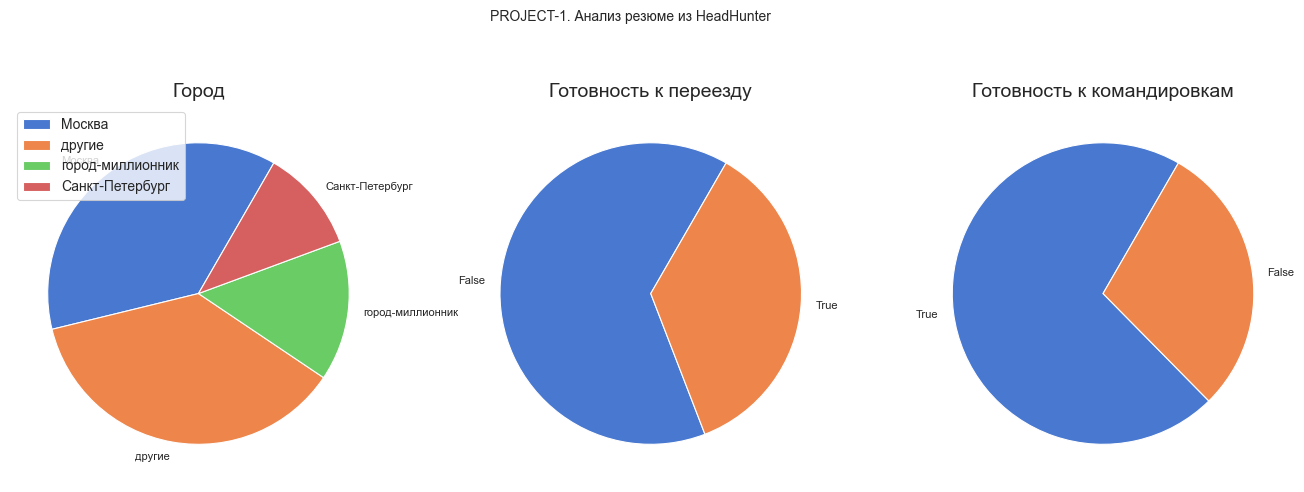

In [41]:
# создание нового признака "Город"
# --------------------------------

# создадим универсальную функция для преобразования строковых записей по заданному правилу
'''
Данная функция создается для формирования нового признака "Город" в данном проекте.
Ее возможно будет использовать в дальнейшем в данном проекте для других преобразований, а также в других проектах.
'''

def transformation_str(
    arg:                    str,
    transformation_dict:    dict,
    exception_list:         list = [],
    other_values:           str = 'other values'):
    
    """
    Преобразует строковую переменную в соответствии с заданными правилами:
        - если правило преобразования учтено в словаре transformation_dict, то функция возвращает преобразованное значение;
        - для значений, содержащихся в списке исключений exception_list, преобразование не производится;
        - во всех прочих случаях функция возвращает 'other values'.
    
    Словарь преобразования transformation_dict формируется следующим образом:
        - ключи словаря (keys) - значения, в которые нужно преобразовать строковую переменную;
        - значения словаря (values), привязанные к ключам (keys) - списки текстовых фрагментов; если строковая переменная содержит один из текстовых фрагментов,
          то ее значение заменяется на ключ словаря (keys).
        
    Args:
        arg (str):
            исходная строковая переменная.
        transformation_dict (dict):
            словарь преобразования.
        exception_list (list):
            список исключений.
            Defaults to [].
        other_values (str, optional):
            значения преобразованной переменной для случаев преобразования, не охваченных словарем transformation_dict.
            Defaults to  'other values'.
    
    Returns:
        result (str):
            преобразованное значение переменной.
    """
    
    exception_list = exception_list or []    # учитываем особенность аргумента по умолчанию, который является списком (list)
    transformation_dict_keys_list = list(transformation_dict.keys())
    result = other_values
    for key_elem in transformation_dict_keys_list:
        for value_elem in transformation_dict[key_elem]:
            if value_elem in arg:
                result = key_elem
    if arg in exception_list:
        result = arg
    return result

# формируем словарь для преобразования данных
million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 
                  'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
transformation_dict = {
    'Москва': ['Москва'],
    'Санкт-Петербург': ['Санкт-Петербург'],
    'город-миллионник': million_cities
    }

# формируем новый признак "Город"
dataset_df_raw['Город'] = dataset_df_raw['Город, переезд, командировки'].\
    apply(lambda arg: arg.split(sep = ' ', maxsplit = -1)[0])    # выделяем первое слово записи - город проживания (т.к. в строке присутствуют названия и других городов)

get_city = lambda arg: transformation_str(
    arg,
    transformation_dict = transformation_dict,
    other_values = 'другие')

dataset_df_raw['Город'] = dataset_df_raw['Город'].\
    apply(get_city)
print(dataset_df_raw['Город'].value_counts(), '\n')



# создание новых признаков "Готовность к переезду" и "Готовность к командировкам"
# -------------------------------------------------------------------------------

# создадим универсальную функция для бинарного преобразования строковых записей
def transformation_str_binary(
    arg:                                str,
    check_list_include_positive:        list = [], 
    check_list_include_negative:        list = [],
    check_list_not_include_positive:    list = [], 
    check_list_not_include_negative:    list = [],
    positive_value = True,
    negative_value = False):
    
    """
    Преобразует строковую переменную бинарную в соответствии с заданными правилами:
        - если аргумент содержит текстовый фрагмент из списка check_list_include_positive, то функция возвращает positive_value;
        - если аргумент содержит текстовый фрагмент из списка check_list_include_negative, то функция возвращает negative_value;
        - если аргумент не содержит текстовый фрагмент из списка check_list_not_include_positive, то функция возвращает positive_value;
        - если аргумент не содержит текстовый фрагмент из списка check_list_not_include_negative, то функция возвращает negative_value;
        - во всех прочих случаях функция возвращает '???'.
    
    Note: 
        1. По значению '???' можно отфильтровать рабочий датасет, чтобы исследовать неохваченные записи, проанализировать их, и, 
    постепенно расширяя списки, добиться полного исчезновения '???'). Таким образом будет реализована пошаговая процедура 
    преобразования строковой записи в датасете.
        2. По умолчанию бинарная переменная имеет значения True/False, то можно задавать и другие знчения (например, 0/1 и пр.).
    
    Args:
        arg (str):
            исходная строковая переменная.
        check_list_include_positive (list):
            список; если аргумент содержит текстовый фрагмент из данного списка, то функция возвращает positive_value.
            Defaults to [].
        check_list_include_negative (list):
            список; если аргумент содержит текстовый фрагмент из данного списка, то функция возвращает negative_value.
            Defaults to [].
        check_list_not_include_positive (list):
            список; если аргумент не содержит текстовый фрагмент из данного списка, то функция возвращает positive_value.
            Defaults to [].
        check_list_not_include_negative (list):
            список; если аргумент не содержит текстовый фрагмент из данного списка, то функция возвращает negative_value.
            Defaults to [].
        positive_value, negative_value:
            значения, которые возвращает функция в случае позитивного/негативного преобразования.
            Defaults to True/False.
    
    Returns:
        result:
            преобразованное значение переменной.
    """
    
    # учитываем особенность аргумента по умолчанию, который является списком (list)
    check_list_include_positive = check_list_include_positive or []
    check_list_include_negative = check_list_include_negative or []
    check_list_not_include_positive = check_list_not_include_positive or []
    check_list_not_include_negative = check_list_not_include_negative or []
        
    result = '???'
    for elem in check_list_include_positive:
        if elem in arg:            
            result = positive_value
    for elem in check_list_include_negative:
        if elem in arg:            
            result = negative_value
    for elem in check_list_not_include_positive:
        if elem not in arg:            
            result = positive_value
    for elem in check_list_not_include_negative:
        if elem not in arg:            
            result = negative_value
    return result

# формируем новый признак "Готовность к переезду"
check_list_include_positive = [', готов к переезду', ', готова к переезду', 'хочу переехать']
check_list_include_negative = ['не готов к переезду', 'не готова к переезду']
check_list_not_include_positive = []
check_list_not_include_negative = []

get_movement = lambda arg: transformation_str_binary(
    arg,
    check_list_include_positive,
    check_list_include_negative,
    check_list_not_include_positive,
    check_list_not_include_negative)

dataset_df_raw['Готовность к переезду'] = dataset_df_raw['Город, переезд, командировки'].\
    apply(get_movement)
print(dataset_df_raw['Готовность к переезду'].value_counts(), '\n')

# формируем новый признак "Готовность к командировкам"
check_list_include_positive = [', готов к командировк', ', готова к командировк', ', готов к редким командировк', ', готова к редким командировк']
check_list_include_negative = ['не готов к командировкам', 'не готова к командировкам']
check_list_not_include_positive = []
check_list_not_include_negative = ['командировк']

get_trip = lambda arg: transformation_str_binary(
    arg,
    check_list_include_positive,
    check_list_include_negative,
    check_list_not_include_positive,
    check_list_not_include_negative)

dataset_df_raw['Готовность к командировкам'] = dataset_df_raw['Город, переезд, командировки'].\
    apply(get_trip)
print(dataset_df_raw['Готовность к командировкам'].value_counts(), '\n')


# удаляем признак "Город, переезд, командировки" и выводим результат преобразования
# ---------------------------------------------------------------------------------
dataset_df_raw = dataset_df_raw.drop(columns = 'Город, переезд, командировки')
display(dataset_df_raw.head(3))#, display(dataset_df_raw.tail(3))



# отвечаем на контрольный вопрос №3.4
# -----------------------------------

# Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.
X1 = dataset_df_raw['Город'].value_counts(normalize=True)['Санкт-Петербург']
print(f'Сколько процентов соискателей живут в Санкт-Петербурге? {round(X1*100, 0)}%\n')

# Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.
mask1 = dataset_df_raw['Готовность к переезду'] == True
mask2 = dataset_df_raw['Готовность к командировкам'] == True
X2 = dataset_df_raw[mask1 & mask2].shape[0] / dataset_df_raw.shape[0]
print(f'Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? {round(X2*100, 0)}%\n')         



# дополнительно - выполним визуализацию
# -------------------------------------

# !!!!!!!!!!!!!!!!!!!!!! задать цветовую гамму для ax2 ax3
data1 = dataset_df_raw['Город'].value_counts()
data2 = dataset_df_raw['Готовность к переезду'].value_counts()
data3 = dataset_df_raw['Готовность к командировкам'].value_counts()

#fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (297/INCH, 210/INCH))
fig = plt.figure(figsize = (210/INCH*2, 297/INCH/2))
fig.suptitle(title_figure, fontsize = 10)    # заголовок рисунка (Figure)
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

data1.plot.pie(
    label = "",
    #autopct = '%.1f%%',
    startangle = 60,
    legend = True,
    title = "Город",
    ax = ax1)

data2.plot.pie(
    label = "",
    #autopct = '%.1f%%',
    startangle = 60,
    legend = False,
    title = "Готовность к переезду",
    ax = ax2)

data3.plot.pie(
    label = "",
    #autopct = '%.1f%%',
    startangle = 60,
    legend = False,
    title = "Готовность к командировкам",
    ax = ax3)
plt.show()

#### 5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. 

Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [42]:
# создание новых признаков-мигалок, связанных с занятостью
# --------------------------------------------------------
'''
Воспользуемся ранее созданной функцией бинарного преобразования строковых записей transformation_str_binary.
Будем реализовывать ее в цикле.

Примечание: нужно обратить внимание, что имеет значение, какая буква - 'е' или 'ё' - используется в слове 'волонтерство'.
Для этого предварительно отфильтруем записи с целью проверки, имеется ли в записях текстовый фрагмент с буквой 'ё'.
'''

# проверяем наличие текстового фрагмента с буквой 'ё' с помощью метода str.contains
mask = dataset_df_raw['Занятость'].str.contains('ё')
display(dataset_df_raw[mask])
'''
Видим, что текстовый фрагмент с буквой 'ё' отсутствует.
'''
        
# формируем новые признаки        
column_list = ['полная занятость', 'частичная занятость', 'проектная работа', 'стажировка', 'волонтерство']

for col in column_list:
    check_list = []
    check_list.append(col)
    get_col = lambda arg: transformation_str_binary(
        arg, 
        check_list_include_positive = check_list,
        check_list_not_include_negative = check_list)
    dataset_df_raw[col.capitalize()] = dataset_df_raw['Занятость'].\
        apply(get_col)
    print(dataset_df_raw[col.capitalize()].value_counts(), '\n')


# создание новых признаков-мигалок, связанных с графиком
# ------------------------------------------------------    

# проверяем наличие текстового фрагмента с буквой 'ё' с помощью метода str.contains
mask = dataset_df_raw['График'].str.contains('ё')
display(dataset_df_raw[mask])
'''
Видим, что текстовый фрагмент с буквой 'ё' отсутствует.
'''

# формируем новые признаки        
column_list = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

for col in column_list:
    check_list = []
    check_list.append(col)
    get_col = lambda arg: transformation_str_binary(
        arg, 
        check_list_include_positive = check_list,
        check_list_not_include_negative = check_list)
    dataset_df_raw[col.capitalize()] = dataset_df_raw['График'].\
        apply(get_col)
    print(dataset_df_raw[col.capitalize()].value_counts(), '\n')


# удаляем признаки "Занятость" и "График", выводим результат преобразования
# ---------------------------------------------------------------------------------
dataset_df_raw = dataset_df_raw.drop(columns = 'Занятость')
dataset_df_raw = dataset_df_raw.drop(columns = 'График')
display(dataset_df_raw.head(3))#, display(dataset_df_raw.tail(3))
dataset_df_raw.info()


# отвечаем на контрольный вопрос №3.5
# -----------------------------------
# Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?
mask1 = dataset_df_raw['Проектная работа']
mask2 = dataset_df_raw['Волонтерство']
#display(dataset_df_raw[mask1 & mask2])
print(f'Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)? {dataset_df_raw[mask1 & mask2].shape[0]}\n')

# Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
mask1 = dataset_df_raw['Вахтовый метод']
mask2 = dataset_df_raw['Гибкий график']
#display(dataset_df_raw[mask1 & mask2])
print(f'Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)? {dataset_df_raw[mask1 & mask2].shape[0]}\n')

,ЗП,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам


Полная занятость
True     43284
False     1460
Name: count, dtype: int64 

Частичная занятость
False    31608
True     13136
Name: count, dtype: int64 

Проектная работа
False    36676
True      8068
Name: count, dtype: int64 

Стажировка
False    41940
True      2804
Name: count, dtype: int64 

Волонтерство
False    44258
True       486
Name: count, dtype: int64 



,ЗП,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам,Полная занятость,Частичная занятость,Проектная работа,Стажировка,Волонтерство


Полный день
True     41716
False     3028
Name: count, dtype: int64 

Сменный график
False    32019
True     12725
Name: count, dtype: int64 

Гибкий график
False    29160
True     15584
Name: count, dtype: int64 

Удаленная работа
False    29722
True     15022
Name: count, dtype: int64 

Вахтовый метод
False    41660
True      3084
Name: count, dtype: int64 



,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,Полная занятость,Частичная занятость,Проектная работа,Стажировка,Волонтерство,Полный день,Сменный график,Гибкий график,Удаленная работа,Вахтовый метод
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0000,...,True,True,True,False,False,True,True,True,True,True
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0000,...,True,True,True,False,False,True,True,True,True,False
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0000,...,True,False,False,False,False,True,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Последнее/нынешнее место работы  44743 non-null  object 
 3   Последняя/нынешняя должность     44742 non-null  object 
 4   Обновление резюме                44744 non-null  object 
 5   Авто                             44744 non-null  object 
 6   Образование                      44744 non-null  object 
 7   Пол                              44744 non-null  object 
 8   Возраст                          44744 non-null  int32  
 9   Опыт работы (месяц)              44574 non-null  float64
 10  Город                            44744 non-null  object 
 11  Готовность к переезду            44744 non-null  bool   
 12  Готовность к коман

#### 6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 

В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [43]:
display(dataset_df_raw.head(3))#, display(dataset_df_raw.tail(3))
dataset_df_raw.info()

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,Полная занятость,Частичная занятость,Проектная работа,Стажировка,Волонтерство,Полный день,Сменный график,Гибкий график,Удаленная работа,Вахтовый метод
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0000,...,True,True,True,False,False,True,True,True,True,True
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0000,...,True,True,True,False,False,True,True,True,True,False
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0000,...,True,False,False,False,False,True,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Последнее/нынешнее место работы  44743 non-null  object 
 3   Последняя/нынешняя должность     44742 non-null  object 
 4   Обновление резюме                44744 non-null  object 
 5   Авто                             44744 non-null  object 
 6   Образование                      44744 non-null  object 
 7   Пол                              44744 non-null  object 
 8   Возраст                          44744 non-null  int32  
 9   Опыт работы (месяц)              44574 non-null  float64
 10  Город                            44744 non-null  object 
 11  Готовность к переезду            44744 non-null  bool   
 12  Готовность к коман

In [44]:
# загружаем данные о курсах валют
# -------------------------------
ExchangeRates_df = pd.read_csv(
    filepath_or_buffer='data/ExchangeRates.csv',
    sep=','
    )

ExchangeRates_df['date'] = pd.to_datetime(
    ExchangeRates_df['date'],
    dayfirst = True)#.dt.date

ExchangeRates_df = ExchangeRates_df.drop(columns = ['per', 'time', 'vol'])

display(ExchangeRates_df.head(5)), #display(ExchangeRates_df.tail(3))
ExchangeRates_df.info()


# преобразуем данные о заработной плате (признак "ЗП") в заданной валюте
# ----------------------------------------------------------------------

# разделяем значения признака на числовую (величина з/п) и текстовую часть (обозначение денежной единицы)
dataset_df_raw['ЗП (value)'] = dataset_df_raw['ЗП'].\
    apply(lambda x: x.split()[0]).\
        apply(float)
dataset_df_raw['ЗП (currency)'] = dataset_df_raw['ЗП'].\
    apply(lambda x: x.split()[1])
print(dataset_df_raw['ЗП (currency)'].value_counts(), '\n')

'''
Далее воспользуемся ранее созданной функцией преобразования строковых записей transformation_str.
'''

# создаем словарь преобразования в соответствии с кодами валют
transformation_dict = {
    'RUB': ['руб.'],
    'BYN': ['бел.руб.'],
    'UAH': ['грн.'],
    'UZS': ['сум']}

# преобразуем обозначения денежных единиц в соответствии с кодами валют
value_list = list(dataset_df_raw['ЗП (currency)'].unique())    # общий список уникальных обозначений денежных единиц
transformation_list = [elem[0] for elem in list(transformation_dict.values())]    # список обозначений денежных единиц для трансформации
exception_list = [elem for elem in value_list if (elem not in transformation_list)]    # список исключений

get_currency = lambda arg: transformation_str(
    arg,
    transformation_dict = transformation_dict,
    exception_list = exception_list)

dataset_df_raw['ЗП (currency) new'] = dataset_df_raw['ЗП (currency)'].\
    apply(get_currency)
print(dataset_df_raw['ЗП (currency) new'].value_counts(), '\n')

# удаляем признак "ЗП (currency)" и переименовываем признак "ЗП (currency) new"
dataset_df_raw = dataset_df_raw.drop(columns = 'ЗП (currency)')
dataset_df_raw = dataset_df_raw.rename(columns = {'ЗП (currency) new':'ЗП (currency)'})


# преобразуем данные о дате обновления резюме (признак "Обновление резюме")
# -------------------------------------------------------------------------

dataset_df_raw['Дата обновления резюме'] = pd.to_datetime(
    dataset_df_raw['Обновление резюме'],
    dayfirst = True)#.dt.date


# формируем признак с заработной платой в рублях на дату обновления резюме
# ------------------------------------------------------------------------
import datetime
# объединяем таблицы dataset_df_raw и ExchangeRates_df
dataset_df_raw = dataset_df_raw.merge(
    ExchangeRates_df,
    how = 'left',
    left_on = ['ЗП (currency)', 'Дата обновления резюме'],
    right_on = ['currency', 'date'])

display(dataset_df_raw.head(5)), #display(dataset_df_raw.tail(3))
dataset_df_raw.info()

#
#display(dataset_df_raw.head(3))#, display(dataset_df_raw.tail(3))
#dataset_df_raw.info()

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17876\812086130.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ExchangeRates_df['date'] = pd.to_datetime(


,currency,date,close,proportion
0,USD,2017-12-29,57.6291,1
1,USD,2017-12-30,57.6002,1
2,USD,2017-12-31,57.6002,1
3,USD,2018-01-01,57.6002,1
4,USD,2018-01-02,57.6002,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5664 entries, 0 to 5663
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   currency    5664 non-null   object 
 1   date        5664 non-null   object 
 2   close       5664 non-null   float64
 3   proportion  5664 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 177.1+ KB
ЗП (currency)
руб.        42471
KZT          1108
USD           628
бел.руб.      329
EUR           106
грн.           73
сум            20
KGS             6
AZN             3
Name: count, dtype: int64 

ЗП (currency) new
RUB    42471
KZT     1108
USD      628
BYN      329
EUR      106
UAH       73
UZS       20
KGS        6
AZN        3
Name: count, dtype: int64 



,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,Гибкий график,Удаленная работа,Вахтовый метод,ЗП (value),ЗП (currency),Дата обновления резюме,currency,date,close,proportion
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0000,...,True,True,True,29000.0000,RUB,2019-04-16,NaN,NaN,NaN,NaN
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0000,...,True,True,False,40000.0000,RUB,2019-04-12,NaN,NaN,NaN,NaN
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0000,...,False,False,False,20000.0000,RUB,2019-04-16,NaN,NaN,NaN,NaN
3,100000 руб.,"Веб-разработчик (HTML / CSS / JS / PHP / базы данных; фреймворки, дизайн, интерфейсы, CMS)",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38,225.0000,...,True,True,False,100000.0000,RUB,2019-04-08,NaN,NaN,NaN,NaN
4,140000 руб.,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0000,...,False,False,False,140000.0000,RUB,2019-04-22,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Последнее/нынешнее место работы  44743 non-null  object 
 3   Последняя/нынешняя должность     44742 non-null  object 
 4   Обновление резюме                44744 non-null  object 
 5   Авто                             44744 non-null  object 
 6   Образование                      44744 non-null  object 
 7   Пол                              44744 non-null  object 
 8   Возраст                          44744 non-null  int32  
 9   Опыт работы (месяц)              44574 non-null  float64
 10  Город                            44744 non-null  object 
 11  Готовность к переезду            44744 non-null  bool   
 12  Готовность к коман

In [46]:
dataset_df_raw.loc[0, 'Дата обновления резюме']

datetime.date(2019, 4, 16)

In [45]:
ExchangeRates_df.loc[0, 'date']

datetime.date(2017, 12, 29)

In [29]:
import datetime
mask1 = ExchangeRates_df['currency'] == 'USD'
mask2 = ExchangeRates_df['date'] == datetime.date(2017, 12, 29)
#display(ExchangeRates_df[mask1 & mask2])
display(ExchangeRates_df[mask2])

,currency,date,close,proportion
0,USD,2017-12-29,57.6291,1
708,EUR,2017-12-29,68.7861,1
1416,KZT,2017-12-29,17.3621,100
2124,KGS,2017-12-29,83.0630,10
2832,BYN,2017-12-29,29.1970,1
3540,UAH,2017-12-29,20.5525,10
4248,UZS,2017-12-29,70.9712,10000
4956,AZN,2017-12-29,33.8995,1


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

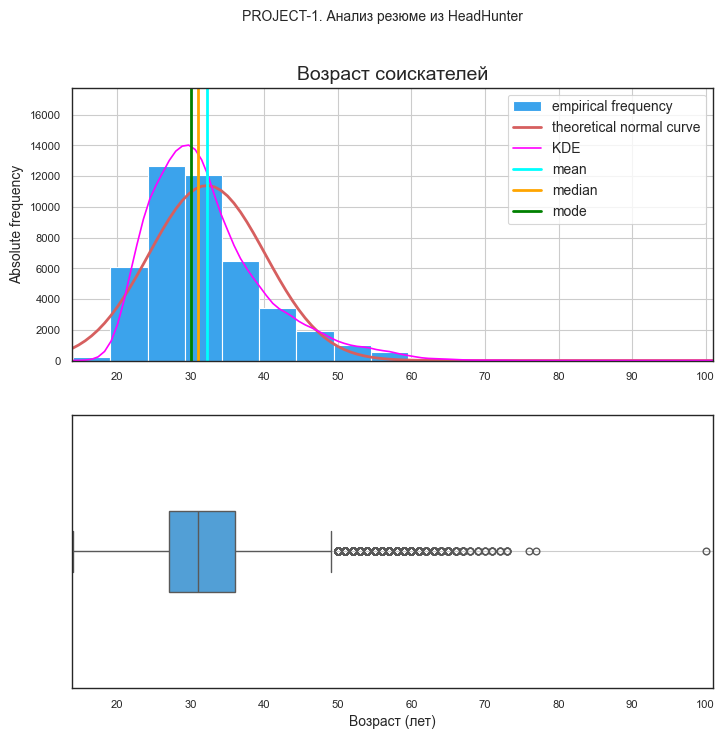

In [17]:
# сформируем функцию для визуализации распределения количественных признаков
'''
Данная функция уже использовалась мной в проектах DS, в частности при обучении в Skillfactory в проекте PYTHON-13. Visualisation. Consolidation of knowledge. Сразу приведем код функции.
Будем использовать эту функции здесь и далее.
'''

def graph_hist_boxplot_probplot_sns(
    data,
    data_min                  = None, 
    data_max                  = None,
    graph_inclusion:          str = 'hbp',
    bins_hist:                str = 'auto',
    density_hist:             bool = False,
    type_probplot:            str = 'pp',
    title_figure:             str = None, 
    title_figure_fontsize:    int = 10,
    title_axes:               str = None, 
    title_axes_fontsize:      int = 14,
    data_label:               str = None,
    label_fontsize:           int = 10, 
    tick_fontsize:            int = 8, 
    label_legend_fontsize:    int = 10,
    graph_size:               tuple = None,
    file_name:                str = None):
    
    """
    Визуализация: строит совмещенный график - 
    гистограмму, коробчатую диаграмму и вероятностный график - 
    на одном рисунке (Figure)

    Args:
        data:                                     
            исходный массив данных.
            
        data_min, data_max (optional):            
            мин. и макс. значение рассматриваемой величины для отображения 
            на графиках. 
            Defaults to None.
            
        graph_inclusion (str, optional):          
            параметр, определяющий набор графиков на одном рисунке (Figure).                                                  
            Defaults to 'hbp', где:                                                      
                'h' - hist (гистограмма)                                                      
                'b' - boxplot (коробчатая диаграмма)                                                      
                'p' - probplot (вероятностный график)
                
        bins_hist (str, optional):                
            способ определения числа интервалов гистограммы:
            ('auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', 'sqrt')
            # https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges                                                  
            Defaults to 'auto'.
            
        density_hist (bool, optional):            
            вид гистограммы: с относительными/абсолютными частоты (True/False). 
            Defaults to False.
            
        type_probplot (str, optional):            
            вид вероятностного графика ('pp', 'qq'). 
            Defaults to 'pp'.
            
        title_figure (str, optional):             
            заголовок рисунка (Figure). 
            Defaults to None.
            
        title_figure_fontsize (int, optional):    
            размер шрифта заголовка рисунка (Figure). 
            Defaults to 10.
            
        title_axes (str, optional):               
            заголовок области рисования (Axes). 
            Defaults to None.
        
        title_axes_fontsize (int, optional):      
            размер шрифта заголовка области рисования (Axes). 
            Defaults to 14.
        
        data_label (str, optional):              
            подпись оси абсцисс. 
            Defaults to None.
        
        label_fontsize (int, optional):           
            размер шрифта подписи оси абсцисс. 
            Defaults to 10.
        
        tick_fontsize (int, optional):            
            размер шрифта меток оси абсцисс. 
            Defaults to 8.
        
        label_legend_fontsize (int, optional):    
            размер шрифта легенды. 
            Defaults to 10.
        
        graph_size (tuple, optional):             
            размер графика в дюймах. 
            Defaults to None.
            
        file_name (str, optional):                
            имя файла для сохранения на диске. 
            Defaults to None.    
            
    Returns:
        None
            
    """
    
    import scipy.stats as sps
    import statsmodels.api as sm
    import scipy as sci
    import statistics as stat
    
    X = np.array(data)
    Xmin = data_min
    Xmax = data_max
        
    if not(Xmin) and not(Xmax):
        Xmin=min(X)*0.99
        Xmax=max(X)*1.01
        
    # определение формы и размеров области рисования (Axes)
    count_graph = len(graph_inclusion)    # число графиков
    
    ax_rows = count_graph    # размерность области рисования (Axes)
    ax_cols = 1
    
    # создание рисунка (Figure) и области рисования (Axes)
    graph_size_dict = {
        1: (210/INCH, 297/INCH/2),
        2: (210/INCH, 297/INCH/1.5),
        3: (210/INCH, 297/INCH)}
    
    if not(graph_size):
        graph_size = graph_size_dict[count_graph]
    
    fig = plt.figure(figsize=graph_size)
    
    if count_graph == 3:
        ax1 = plt.subplot(3,1,1)
        ax2 = plt.subplot(3,1,2)
        ax3 = plt.subplot(3,1,3)
    elif count_graph == 2:
        ax1 = plt.subplot(2,1,1)
        ax2 = plt.subplot(2,1,2)
    elif count_graph == 1:
        ax1 = plt.subplot(1,1,1)
       
    # заголовок рисунка (Figure)
    fig.suptitle(title_figure, fontsize = title_figure_fontsize)
    
    # заголовок области рисования (Axes)
    ax1.set_title(title_axes, fontsize = title_axes_fontsize)
    
    # гистограмма (hist)
    if 'h' in graph_inclusion:
        X_mean = X.mean()
        X_std = X.std(ddof = 1)
        # выбор числа интервалов 
        #('auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', 'sqrt')
        bins_hist = bins_hist
        # данные для графика плотности распределения
        nx = 100
        hx = (Xmax - Xmin)/(nx - 1)
        x1 = np.linspace(Xmin, Xmax, nx)
        xnorm1 = sps.norm.pdf(x1, X_mean, X_std)
        kx = len(np.histogram(X, bins=bins_hist, density=density_hist)[0])
        xnorm2 = xnorm1*len(X)*(max(X)-min(X))/kx
        g_kde = sps.gaussian_kde(X)
        g_kde_values = g_kde(x1)
        xnorm3 = g_kde_values*len(X)*(max(X)-min(X))/kx
        # выбор вида гистограммы 
        # (density=True/False - плотность/абс.частота) и параметры по оси OY
        xmax = max(np.histogram(X, bins=bins_hist, density=density_hist)[0])
        ax1.set_ylim(0, xmax*1.4)
        if density_hist:
            label_hist = "empirical density of distribution"
            ax1.set_ylabel('Relative density', fontsize = label_fontsize)
        else:
            label_hist = "empirical frequency"
            ax1.set_ylabel('Absolute frequency', fontsize = label_fontsize)
        # рендеринг графика
        if density_hist:
            ax1.hist(
                X,
                bins=bins_hist,
                density=density_hist,
                histtype='bar',    # 'bar', 'barstacked', 'step', 'stepfilled'
                orientation='vertical',
                #color = "#1f77b4",
                color = list(sns.color_palette("husl", 9))[6],
                label=label_hist)
            ax1.plot(
                x1, xnorm1,
                linestyle = "-",
                color = "r",
                linewidth = 2,
                label = 'theoretical normal curve')
            sns.kdeplot(
                data = X,
                color = 'magenta',
                label = 'KDE',
                ax=ax1)
        else:
            ax1.hist(
                X,
                bins=bins_hist,
                density=density_hist,
                histtype='bar',    # 'bar', 'barstacked', 'step', 'stepfilled'
                orientation='vertical',
                #color = "#1f77b4",
                color = list(sns.color_palette("husl", 9))[6],
                label=label_hist)    
            ax1.plot(
                x1, xnorm2,
                linestyle = "-",
                color = "r",
                linewidth = 2,
                label = 'theoretical normal curve')
            ax1.plot(
                x1, xnorm3,
                linestyle = "-",
                color = "magenta",
                #linewidth = 2,
                label = 'KDE')
        ax1.axvline(
            X_mean,
            color='cyan', label = 'mean', linewidth = 2)
        ax1.axvline(
            np.median(X),
            color='orange', label = 'median', linewidth = 2)
        ax1.axvline(stat.mode(X),
            color='green', label = 'mode', linewidth = 2)
        ax1.set_xlim(Xmin, Xmax)
        ax1.legend(fontsize = label_legend_fontsize)
        ax1.tick_params(labelsize = tick_fontsize)
        if (graph_inclusion == 'h') or (graph_inclusion == 'hp'):
            ax1.set_xlabel(data_label, fontsize = label_fontsize)
        ax1.grid()
            
    # коробчатая диаграмма
    if 'b' in graph_inclusion:
        sns.boxplot(
            x=X,
            orient='h',
            width=0.3,
            #color = "#1f77b4",
            color = list(sns.color_palette("husl", 9))[6],
            ax = ax1 if ((graph_inclusion == 'b') or 
                         (graph_inclusion == 'bp')) else ax2)
        if (graph_inclusion == 'b') or (graph_inclusion == 'bp'):
            ax1.set_xlim(Xmin, Xmax)
            ax1.set_xlabel(data_label, fontsize = label_fontsize)
            ax1.tick_params(labelsize = tick_fontsize)
            ax1.yaxis.grid()
        else:
            ax2.set_xlim(Xmin, Xmax)
            ax2.set_xlabel(data_label, fontsize = label_fontsize)
            ax2.tick_params(labelsize = tick_fontsize)
            ax2.yaxis.grid()
    
    # вероятностный график
    gofplot = sm.ProbPlot(
        X,
        dist=sci.stats.distributions.norm,
        fit=True)
    if 'p' in graph_inclusion:
        if type_probplot == 'pp':
            gofplot.ppplot(
                line="45",
                #color = "blue",
                color = list(sns.color_palette("husl", 9))[6],
                ax = ax1 if (graph_inclusion == 'p') 
                    else ax3 if (graph_inclusion == 'hbp') else ax2)
            boxplot_xlabel = 'Theoretical probabilities'
            boxplot_ylabel = 'Sample probabilities'
        elif type_probplot == 'qq':
            gofplot.qqplot(
                line="45",
                #color = "blue",
                color = list(sns.color_palette("husl", 9))[6],
                ax = ax1 if (graph_inclusion == 'p') 
                    else ax3 if (graph_inclusion == 'hbp') else ax2)
            boxplot_xlabel = 'Theoretical quantilies'
            boxplot_ylabel = 'Sample quantilies'
        boxplot_legend = ['data', 'normal distribution']
        if (graph_inclusion == 'p'):
            ax1.set_xlabel(boxplot_xlabel, fontsize = label_fontsize)
            ax1.set_ylabel(boxplot_ylabel, fontsize = label_fontsize)
            ax1.legend(boxplot_legend, fontsize = label_legend_fontsize)        
            ax1.tick_params(labelsize = tick_fontsize)
            ax1.grid()
        elif (graph_inclusion == 'hbp'):
            ax3.set_xlabel(boxplot_xlabel, fontsize = label_fontsize)
            ax3.set_ylabel(boxplot_ylabel, fontsize = label_fontsize)
            ax3.legend(boxplot_legend, fontsize = label_legend_fontsize)        
            ax3.tick_params(labelsize = tick_fontsize)
            ax3.grid()
        else:
            ax2.set_xlabel(boxplot_xlabel, fontsize = label_fontsize)
            ax2.set_ylabel(boxplot_ylabel, fontsize = label_fontsize)
            ax2.legend(boxplot_legend, fontsize = label_legend_fontsize)        
            ax2.tick_params(labelsize = tick_fontsize)
            ax2.grid()
            
    plt.show()
    if file_name:
        fig.savefig(file_name, orientation = "portrait", dpi = 300)
        
    return


# выполним визуализацию
# ---------------------
data = dataset_df_raw['Возраст']

graph_hist_boxplot_probplot_sns(
    data = data,
    graph_inclusion = 'hb',
    bins_hist = 'sturges',
    density_hist = False,
    title_figure = title_figure,
    title_axes = 'Возраст соискателей',
    data_label = 'Возраст (лет)'
    )

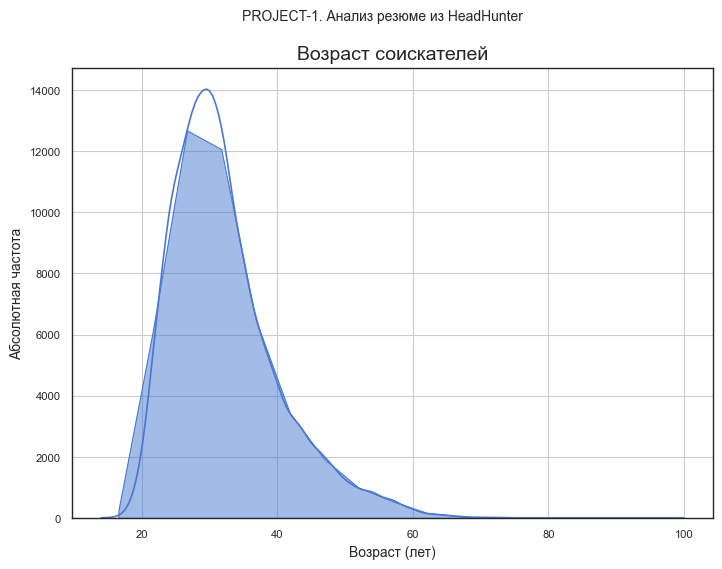

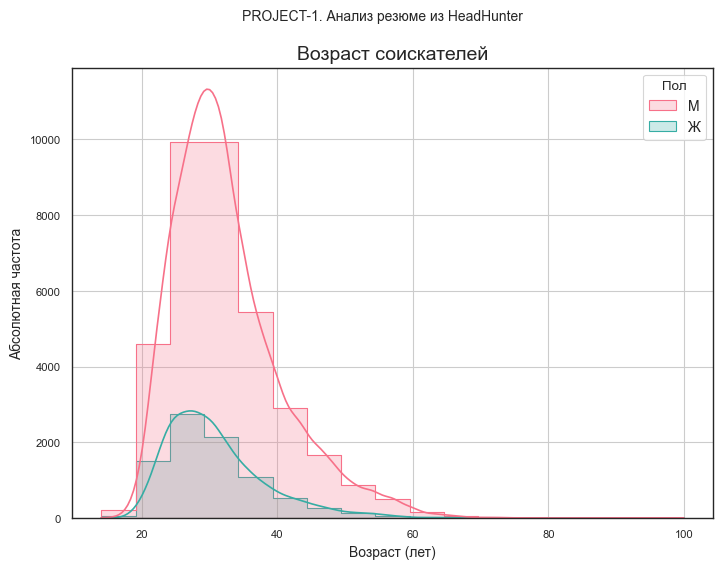

'\nВидим, что признак имеет явно аномальные выбросы в области наибольших значений - максимальные возраст соискателей слишком велик.\nОчевидно, что в датасете имеются ошибки, которые требуют отдельного исследования.\n'

In [18]:
# дополнительно - построим гистограмму возраста соискателей
data = dataset_df_raw
fig, axes = plt.subplots(figsize = (210/INCH, 297/INCH/2))
fig.suptitle(title_figure, fontsize = 10)    # заголовок рисунка (Figure)
axes.set_title('Возраст соискателей', fontsize = 14)    # заголовок области рисования (Axes)
sns.histplot(
    data,
    x = 'Возраст',
    bins = 'sturges',    # выбор числа интервалов ('auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', 'sqrt'))
    stat = 'count',    # выбор вида гистограммы ('count', 'frequency', 'probability', 'percent', 'density')
    kde = True,
    element = 'poly',    # визуальное представление (актуально только для одномерных данных): 'bars', 'step' - гистограмма, 'poly' - полигон
    legend = True,
    ax=axes)
axes.grid()
axes.set_xlabel('Возраст (лет)', fontsize = 10)
axes.set_ylabel('Абсолютная частота', fontsize = 10)
plt.show()

# дополнительно - построим гистограмму возраста соискателей в разрезе пола
data = dataset_df_raw
fig, axes = plt.subplots(figsize = (210/INCH, 297/INCH/2))
fig.suptitle(title_figure, fontsize = 10)    # заголовок рисунка (Figure)
axes.set_title('Возраст соискателей', fontsize = 14)    # заголовок области рисования (Axes)
sns.histplot(
  x = 'Возраст',
  data = data,
  # выбор вида гистограммы 
  # # ('count', 'frequency', 'probability', 'percent', 'density')
  stat = 'count',      
  # выбор числа интервалов 
  # # ('auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', 'sqrt'))
  bins = 'sturges',       
  # оценка плотности ядра (актуально только для одномерных данных)
  kde = True,          
  # визуальное представление (актуально только для одномерных данных): 
  # # 'bars', 'step' - гистограмма, 'poly' - полигон
  element = 'step',    
  hue = 'Пол',
  #multiple = layer,
  legend = True,
  label = '',
  palette = 'husl',
  #color = [sns.color_palette(palette).as_hex()[0:1]],
  ax = axes)
#axes.set_xlim(Y_min_histplot, Y_max_histplot)
axes.grid()
axes.tick_params(labelsize = 8)
plt.setp(axes.get_legend().get_texts(), fontsize = 10) 
axes.set_xlabel('Возраст (лет)', fontsize = 10)
axes.set_ylabel('Абсолютная частота', fontsize = 10)
plt.show()

'''
Видим, что признак имеет явно аномальные выбросы в области наибольших значений - максимальные возраст соискателей слишком велик.
Очевидно, что в датасете имеются ошибки, которые требуют отдельного исследования.
'''

ваши выводы по графику здесь

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [19]:
#.isna()
mask = dataset_df_raw['Опыт работы (месяц)'].notnull()
dataset_df_raw[mask]['Опыт работы (месяц)']

0       202.0000
1       233.0000
2       123.0000
3       225.0000
4        67.0000
          ...   
44739    91.0000
44740    84.0000
44741   257.0000
44742    46.0000
44743   190.0000
Name: Опыт работы (месяц), Length: 44574, dtype: float64

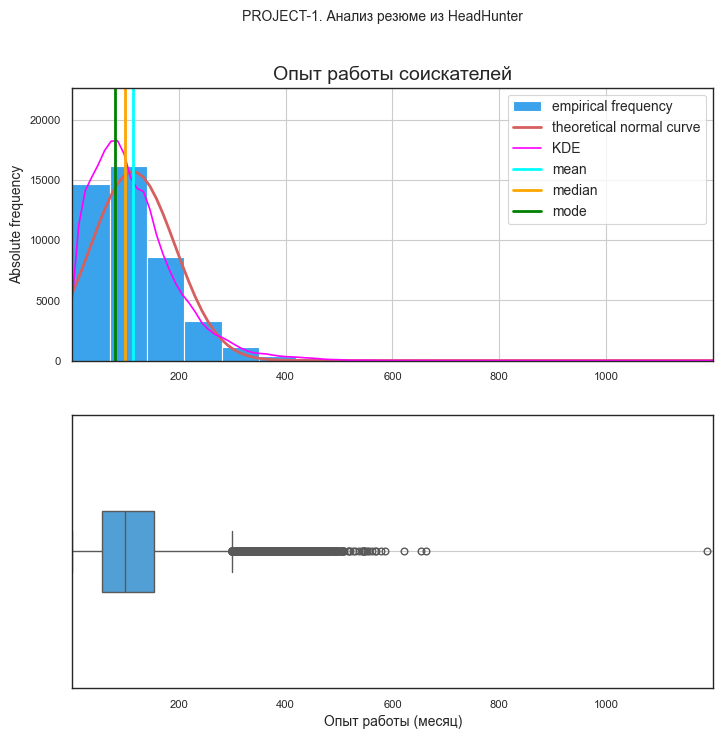

In [20]:
# выполним визуализацию
# ---------------------
mask = dataset_df_raw['Опыт работы (месяц)'].notnull()
data = dataset_df_raw[mask]['Опыт работы (месяц)']

graph_hist_boxplot_probplot_sns(
    data = data,
    graph_inclusion = 'hb',
    bins_hist = 'sturges',
    density_hist = False,
    title_figure = title_figure,
    title_axes = 'Опыт работы соискателей',
    data_label = 'Опыт работы (месяц)'
    )

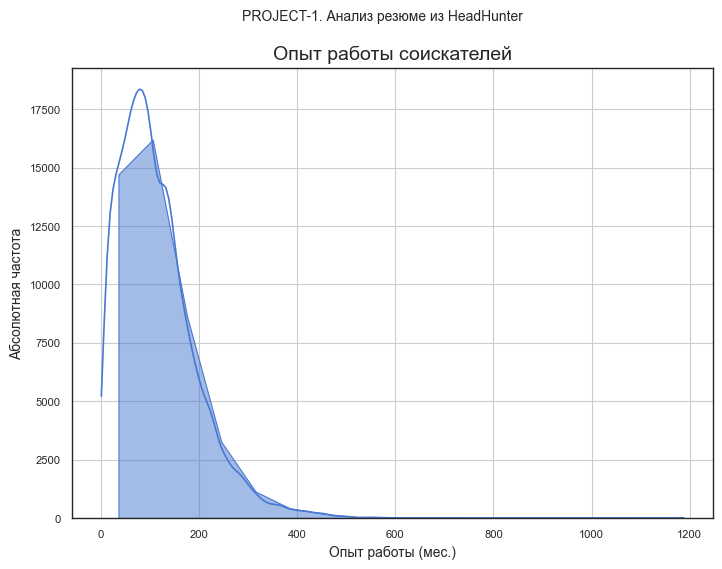

In [21]:
# дополнительно - построим гистограмму опыта работы соискателей
data = dataset_df_raw
fig, axes = plt.subplots(figsize = (210/INCH, 297/INCH/2))
fig.suptitle(title_figure, fontsize = 10)    # заголовок рисунка (Figure)
axes.set_title('Опыт работы соискателей', fontsize = 14)    # заголовок области рисования (Axes)
sns.histplot(
    data,
    x = 'Опыт работы (месяц)',
    bins = 'sturges',    # выбор числа интервалов ('auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', 'sqrt'))
    stat = 'count',    # выбор вида гистограммы ('count', 'frequency', 'probability', 'percent', 'density')
    kde = True,
    element = 'poly',    # визуальное представление (актуально только для одномерных данных): 'bars', 'step' - гистограмма, 'poly' - полигон
    legend = True,
    ax=axes)
axes.grid()
axes.set_xlabel('Опыт работы (мес.)', fontsize = 10)
axes.set_ylabel('Абсолютная частота', fontsize = 10)
plt.show()

ваши выводы здесь

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [22]:
# ваш код здесь

ваши выводы здесь

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [23]:
# ваш код здесь

ваши выводы здесь

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [24]:
# ваш код здесь

ваши выводы здесь

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [25]:
# ваш код здесь

In [26]:
ваши выводы здесь

SyntaxError: invalid syntax (1506124366.py, line 1)

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [ ]:
# ваш код здесь

ваши выводы здесь

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [ ]:
# ваш код здесь

ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
# ваш код здесь

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
# ваш код здесь

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [ ]:
# ваш код здесь

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:
# ваш код здесь

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [ ]:
# ваш код здесь

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [ ]:
# ваш код здесь

ваш коммментарий здесь